In [1]:
import yfinance as yf

data = yf.download(tickers = "GC=F", start="2017-12-01", end="2023-06-08", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [2]:
data = data.reset_index('Date', inplace=False)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional
from sklearn.ensemble import RandomForestRegressor

In [4]:
# 3. Scaler data
#scaler=MinMaxScaler(feature_range=(0,1))
#df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [7]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
#y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

best_score = float('-inf')
best_params = {}

for n_estimators in [100, 200, 500, 1000]:
    for max_depth in [5, 10, 15, 20]:
        for random_state in [1, 42, 77, 123]:
            model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, max_depth=max_depth)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            score = model.score(x_test, y_test)  # R-squared score
            
            if score > best_score:
                best_score = score
                best_params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'random_state': random_state
                }

print("Best parameters:", best_params)

Best parameters: {'n_estimators': 100, 'max_depth': 5, 'random_state': 42}


In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [10]:
y_pred = model.predict(x_test)

In [11]:
y_pred_val =  model.predict(x_val)

In [12]:
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766]


In [13]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 144.9097246540993
Testing RMSE: 90.0060830974895


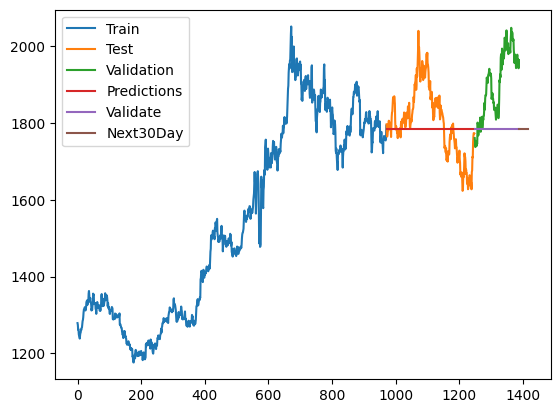

In [15]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## X: 'Open', 'High', 'Low', 'Close', 'Volume'

## y= 'Adj Close'

In [31]:
import yfinance as yf

df = yf.download(tickers = "GC=F", start="2017-12-01", end="2023-06-08", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [32]:
df = df.reset_index('Date', inplace=False)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [34]:
# 4. Chia train test
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [37]:
X_train= train_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y_train= train_data['Adj Close']

X_test= test_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y_test= test_data['Adj Close']

X_val= val_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y_val= val_data['Adj Close']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_val = scale.transform(X_val)

In [43]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[1798.50875735 1769.90463578 1767.78784163 1773.15998379 1781.00481118
 1779.0571092  1797.51250595 1805.60541144 1792.00112381 1799.60849998
 1802.79768733 1779.88695593 1796.41457155 1786.89591999 1760.83613559
 1792.71012104 1811.9870538  1830.18265623 1832.3616622  1850.17240363
 1862.5509595  1868.8137752  1866.12606511 1855.54934256 1871.37411676
 1860.09489198 1853.24745498 1805.60541144 1781.00481118 1781.00481118
 1791.78326676 1781.65760458 1779.39877151 1775.94832233 1779.39877151
 1757.80138678 1779.39877151 1776.22289112 1779.39877151 1781.00481118
 1776.22289112 1779.69628711 1784.64103493 1774.31709112 1760.60401605
 1798.30248253 1805.3909628  1792.98617087 1786.89591999 1802.79768733
 1808.40996352 1807.51486085 1808.25882593 1805.60541144 1809.64577685
 1830.18265623 1799.87036502 1811.50343696 1827.44876983 1786.89591999
 1798.77550615 1799.60849998 1814.01418045 1830.18265623 1824.94996367
 1811.9870538  1809.64577685 1840.2402815  1840.2402815  1832.3616622
 1839.1

In [44]:
validate = model.predict(X_val)
print(validate)
print(validate.shape)

[1758.03975935 1751.30431374 1733.90304716 1733.90304716 1744.13934836
 1755.20386211 1738.46528455 1749.01910485 1744.91023775 1802.48482324
 1797.51250595 1769.90463578 1772.93773796 1782.58795391 1786.89591999
 1799.60849998 1778.69273262 1811.50343696 1806.55998809 1776.22289112
 1788.99596369 1786.62742964 1811.50343696 1811.50343696 1786.62742964
 1797.51250595 1811.50343696 1807.51486085 1818.06187818 1818.36345835
 1836.21828395 1855.05357367 1834.62338841 1864.87991626 1873.76367716
 1872.92122828 1875.25821202 1896.65780313 1921.51003871 1909.05711846
 1904.495744   1900.81453208 1923.82396852 1928.11254475 1928.49570874
 1936.30798655 1943.12586527 1929.32429884 1928.89729982 1924.24905626
 1931.68674444 1928.89729982 1916.49246851 1861.85624584 1866.27642494
 1872.92122828 1877.31127678 1866.08065715 1861.66047805 1854.32495214
 1855.80367445 1834.24859004 1839.76872528 1837.04498946 1833.77970595
 1832.3616622  1813.74602313 1807.51486085 1812.50807334 1831.12193644
 1835.

In [45]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))

Mean Absolute Error: 2.4833
Mean Squared Error: 13.2201
Root Mean Squared Error: 3.6359
(R^2) Score: 0.9983


In [46]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_val, validate), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_val, validate), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_val, validate)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_val, validate), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% , Test Score : {model.score(X_test, y_test) * 100:.2f}% and Validate Score : {model.score(X_val, y_val) * 100:.2f}% using Random forest Regressor.')

Mean Absolute Error: 3.8686
Mean Squared Error: 34.6002
Root Mean Squared Error: 5.8822
(R^2) Score: 0.9954
Train Score : 99.98% , Test Score : 99.83% and Validate Score : 99.54% using Random forest Regressor.


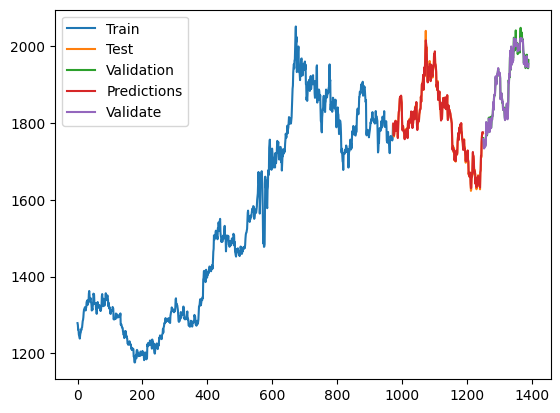

In [49]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, predict)
plt.plot(val_data.index, validate)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate'])
plt.show()